In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import os
from sklearn.cluster import KMeans

### Step 1: Kmeans      
For this section, load up the 'new_demographic_data.xls' spreadsheet into Python using pandas. You will see there are two columns (PC1 and PC2) corresponding to PCA results applied to SNV data for each sample.

Apply Kmeans to these two variables using SKlearn with a range of k clusters from k = 1 to k =10.
Recall that we can measure the goodness of fit of Kmeans using 'Inertia'. For each k, fit the model and record the interia. You will also need to record the 'labels' - these labels tell you which cluster each row belongs to for each k.

Finally, plot the inertia against k to give an elbow plot, identify the optimal k number.
For the optimal k number, look at the class labels for each row, do they correspond to ancestry?
You can use the .loc function in Pandas to select out different cluster labels.

In [7]:
# load the demographics data using pandas, view the top 5 rows and list the column names. 
path = '/home/changhyun/King\'s College London/ml_bioinfo_hi/topic8/demographic_data.xls'

demodf = pd.read_excel(path)
demodf.columns
# print(demodf.head())

Index(['Unnamed: 0', 'ID', 'phenotype', 'sex', 'ancestry', 'PC1', 'PC2'], dtype='object')

In [8]:
# run multiple Kmeans models on the 2 PC columns with K ranging from 1 to 10. Remember to store the results for every
# K value (store labels in label_list and inertia in inertia_list) and generate a list of K values (k_list). 

k_list = []
label_list = []
inertia_list = []
for k in range(1,11):
    k_list.append(k)
    model = KMeans(n_clusters=k)
    model_fit = model.fit(demodf.loc[:,['PC1', 'PC2']])
    label_list.append(model_fit.labels_)
    inertia_list.append(model.inertia_)
    ### your code here ###
    
    

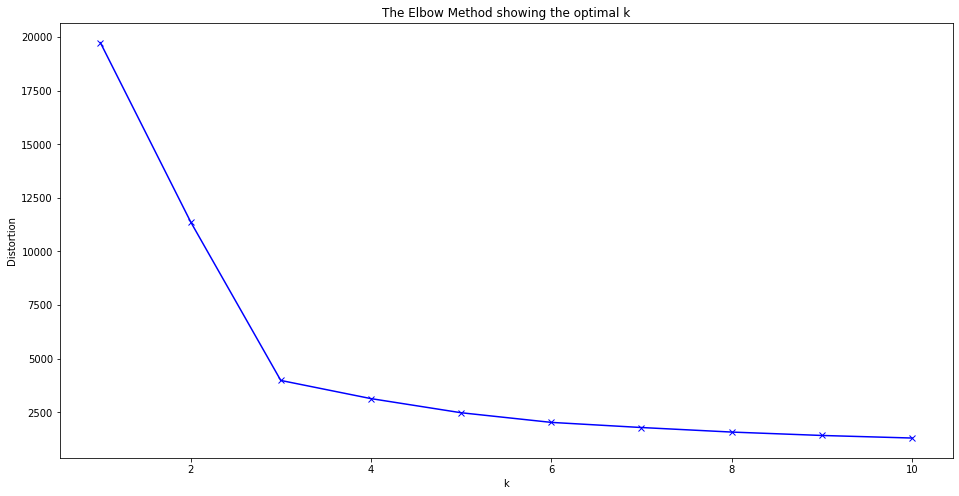

In [10]:
# plot K list against inertia list to generate an elbow plot. 
# please label the x and y axis.

### your code here ### 
plt.figure(figsize=(16,8))
plt.plot(k_list, inertia_list, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
# Now you know the best K number, find the class label results associated with this value of K. These are stored in 
# label_list. NB the first item in label_list = label_list[0], this does not correspond to K = 0. 

# add the labels as a new column to new_df. 
# Then, using df.loc and groupby(), extract out rows for each cluster label and observe the ancestry associated with 
# each cluster. 

new_df = demodf
new_df['label'] = label_list[2]
new_df
### Your code here ###

new_df[new_df['label'] == 2]

,Unnamed: 0,ID,phenotype,sex,ancestry,PC1,PC2,label
5,5,ID_006,1,male,african,-0.956682,-0.376398,2
7,7,ID_008,1,male,african,-1.731386,-0.053361,2
10,10,ID_011,0,female,african,-0.061388,-2.534112,2
12,12,ID_013,0,female,african,-1.740680,-0.967025,2
17,17,ID_018,1,male,african,-2.232146,-1.153035,2
...,...,...,...,...,...,...,...,...
682,682,ID_683,0,female,african,0.156299,1.222931,2
683,683,ID_684,1,male,african,3.562447,1.459757,2
685,685,ID_686,1,female,african,1.264582,0.218100,2
687,687,ID_688,1,male,african,-0.228502,-0.671678,2


### Step 2: read in genotype data        
For this step, you will need to merge all of the genotype VCF files into a single pandas dataframe.     
Each row should correspond to a sample ID (stored in the filename). Each column should correspond to a variant, there should also be an ID column.      
 $\;\;\;$ ID $\;\;\;$ chr1:123  $\;\;\;$chr1:456  $\;\;\;$chr1:789 $\;\;\;$ chr1:1011 $\;$...     
ID_001 $\;\;\;\;\;$  1  $\;\;\;\;$  $\;\;\;\;\;\;\;\;$ 0   $\;\;\;\;\;\;\;\;\;\;$    1  $\;\;\;\;\;\;\;\;\;\;\;$   1    
ID_002 $\;\;\;\;\;$  0  $\;\;\;\;$  $\;\;\;\;\;\;\;\;$ 0   $\;\;\;\;\;\;\;\;\;\;$    1  $\;\;\;\;\;\;\;\;\;\;\;$   1       
        
Please have a go at at finding your own solution to this problem, but there is a hint below to help you if needed.    

In [29]:
### your code here ### 
data_path = os.path.relpath('/home/changhyun/King\'s College London/ml_bioinfo_hi/topic8/vcfs')

Hint:     
Use os.litdir() to loop through the files containing the 'vcf' suffix and open them.     
Loop through each of the files and store the genotype data in a list (remember the header lines start with a '#' symbol - do not include these in the list). The first element of the list should be the sample ID.      
These lists should be stored together in a nested list. So you should end up with an array, where each row corresponds to a sample and each column to a genetic locus/genotype (and one column for ID).    
An array like this can be loaded up into a pandas dataframe.    

In [35]:
nestlist = []                # initialise a list to store the genotype data for all individuals
for filename in os.listdir(data_path):                   # loop through the directory of individual VCF files                                    
    if '.vcf' in filename:
        loc_list = []                           # append the variant locations (column1 + ':' + column2) to this list
        sample_id = filename.split('.')[0]
        
        genolist = [sample_id]                  # append the genotype data (0/1) to this list
        file = open(os.path.join(data_path,filename), 'r') 
        for line in file:
            if '#' in line:
                continue
            genolist.append(line.split()[9].split(':')[0])
            loc_list.append(line.split()[0] + ':' + line.split()[1])
        nestlist.append(genolist)
        file.close()
        ### your code here ###                  
                                                # at the end of each file, append the individuals variant list to the
                                                # nested list. 
            

In [36]:
# convert the nested list into a numpy array 

### your code here ### 
genoarray = np.array(nestlist)

In [39]:
# convert the array into a dataframe using pd.DataFrame (columns = ['ID'] + loc_list)
df = pd.DataFrame(genoarray, columns=['ID'] + loc_list)
### your code here ###
df

,ID,chr1:761736,chr1:1467559,chr1:2320149,chr1:2537211,chr1:2640985,chr1:3110371,chr1:3767560,chr1:4760386,chr1:5190398,...,chr22:7702980,chr22:7754807,chr22:7917826,chr22:8339412,chr22:8777336,chr22:9522669,chr22:10184368,chr22:10278717,chr22:11078487,chr22:11944872
0,ID_197,1,0,1,0,1,0,1,0,1,...,1,1,0,0,1,0,0,1,0,0
1,ID_439,1,1,0,0,0,0,1,1,1,...,1,0,1,0,0,1,1,0,1,0
2,ID_430,0,1,1,1,0,0,1,1,1,...,1,0,1,1,0,1,0,0,1,0
3,ID_215,0,0,1,0,1,0,0,0,1,...,1,0,1,0,1,1,1,0,1,1
4,ID_342,0,1,1,1,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,ID_407,0,1,1,0,0,0,0,1,1,...,1,0,1,0,0,1,0,0,0,1
696,ID_238,1,1,0,0,0,0,0,1,0,...,0,1,1,1,1,0,1,1,1,0
697,ID_663,0,0,1,1,1,0,1,0,1,...,1,0,1,1,0,0,1,1,0,0
698,ID_292,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0


### Step 3: preparing data for analysis       
The first thing to do is merge the genotype dataframe and the phenotype dataframe. This is easily achieved using pd.merge.   
The next step will be to convert all non-numerical variables to numerical: namely 'sex' and 'ancestry'. Sex can be easily converted to binary e.g. 0 = male, 1= female. For ancestry, as there are 3 possible values (African, Asian, European), we will use dummy coding I.E. we will make 2 binary variables, one variable corresponding to African = 1, european = 0 and another variable corresponding to Asian = 1, not Asian = 0. 


In [40]:
# merge the phenotype and genotype dataframes on 'ID'

merged_df = pd.merge(new_df, df)
merged_df## your code here ###

,Unnamed: 0,ID,phenotype,sex,ancestry,PC1,PC2,label,chr1:761736,chr1:1467559,...,chr22:7702980,chr22:7754807,chr22:7917826,chr22:8339412,chr22:8777336,chr22:9522669,chr22:10184368,chr22:10278717,chr22:11078487,chr22:11944872
0,0,ID_001,1,female,asian,5.388444,-5.929301,1,0,0,...,1,0,1,1,1,0,1,1,1,1
1,1,ID_002,1,male,european,-2.853298,-9.819218,0,1,0,...,1,0,1,0,1,1,1,1,0,0
2,2,ID_003,1,male,european,2.015809,-8.220454,0,0,0,...,1,0,0,1,1,0,1,0,1,1
3,3,ID_004,0,male,asian,6.102479,-4.118630,1,1,0,...,0,1,1,0,0,1,0,0,0,1
4,4,ID_005,1,female,asian,4.866751,-7.164220,1,0,1,...,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,ID_696,1,male,european,3.952705,-4.926464,1,1,1,...,1,0,1,0,0,1,0,0,1,1
696,696,ID_697,1,male,asian,4.761815,-3.927162,1,0,0,...,1,0,1,0,0,0,1,0,1,0
697,697,ID_698,1,female,european,1.284594,-9.519966,0,0,1,...,1,1,1,0,0,1,1,1,1,1
698,698,ID_699,1,female,african,-2.009418,-0.252052,2,0,1,...,1,1,0,1,1,1,0,0,1,0


In [43]:
# use the map function to convert the str variable sex to binary (0/1)
dict_map = {'female': 0, 'male':1}
### your code here ### 
merged_df['sex'] = merged_df['sex'].map(dict_map)

In [48]:
merged_df.loc[1, 'ancestry']

'european'

In [51]:
asian_list = []                   # initialise 2 lists to be our new ancestry variables. 
afro_euro_list = []

for idx, row in merged_df.iterrows(): # loop through the dataframe. If a row is African, add 0 to asian list and 0 to 
                                      # the afro_euro list. If a row is Asian, add 1 to asian list and 0 to afro_euro.
   ### your code here ###             # If the row is european, add 0 to asian list and 1 to afro_euro list. 
                                      # Thus, the 3 possible ancestries are stored in two variables with no loss of 
                                      # information. 
    if merged_df.loc[idx, 'ancestry'] == 'african':
        asian_list.append(0)
        afro_euro_list.append(0)
    elif merged_df.loc[idx, 'ancestry'] == 'asian':
        asian_list.append(1)
        afro_euro_list.append(0)
    else:
        asian_list.append(0)
        afro_euro_list.append(1)
merged_df['asian'] = asian_list
merged_df['afro_euro'] = afro_euro_list
merged_df

,Unnamed: 0,ID,phenotype,sex,ancestry,PC1,PC2,label,chr1:761736,chr1:1467559,...,chr22:7917826,chr22:8339412,chr22:8777336,chr22:9522669,chr22:10184368,chr22:10278717,chr22:11078487,chr22:11944872,asian,afro_euro
0,0,ID_001,1,0,asian,5.388444,-5.929301,1,0,0,...,1,1,1,0,1,1,1,1,1,0
1,1,ID_002,1,1,european,-2.853298,-9.819218,0,1,0,...,1,0,1,1,1,1,0,0,0,1
2,2,ID_003,1,1,european,2.015809,-8.220454,0,0,0,...,0,1,1,0,1,0,1,1,0,1
3,3,ID_004,0,1,asian,6.102479,-4.118630,1,1,0,...,1,0,0,1,0,0,0,1,1,0
4,4,ID_005,1,0,asian,4.866751,-7.164220,1,0,1,...,1,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,ID_696,1,1,european,3.952705,-4.926464,1,1,1,...,1,0,0,1,0,0,1,1,0,1
696,696,ID_697,1,1,asian,4.761815,-3.927162,1,0,0,...,1,0,0,0,1,0,1,0,1,0
697,697,ID_698,1,0,european,1.284594,-9.519966,0,0,1,...,1,0,0,1,1,1,1,1,0,1
698,698,ID_699,1,0,african,-2.009418,-0.252052,2,0,1,...,0,1,1,1,0,0,1,0,0,0


In [58]:
# drop the 'ancestry' and 'ID' columns from merged_list

### your code here ### 

merged_df = merged_df.drop(columns=['Unnamed: 0', 'ID', 'ancestry'])

### step 4: fit regularised logistic regression with CV     
For this step, start by fitting a logistic regression model from sklearn. The independent variables are all columns in merged_df except for phenotype. The dependent variable is phenotype.     
Try some different input arguments (e.g. penalty, solver) and see how this effects the model. Are there any combinations of inputs that don't work? you might need a high iteration threshold.     
Using the elasticnet penalty and saga solver, run cross validation grid search to find an l1_ratio that gives the highest AUC score. test the l1 values: [0.1, 0.3, 0.5, 0.7, 0.9]    
     
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html     
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html    

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [59]:
### your code here ###
logmod = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.9, solver = 'saga', max_iter = 1000).fit(merged_df.drop('phenotype', axis = 1), merged_df['phenotype'])

In [70]:
LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 1000)

LogisticRegression(max_iter=1000, penalty='elasticnet', solver='saga')

In [76]:
l1_grid = {'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

### your code here ### 

GS = GridSearchCV(estimator=LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 1000), param_grid=l1_grid, scoring='roc_auc')
GS.fit(merged_df.drop('phenotype', axis = 1), merged_df['phenotype'])

GridSearchCV(estimator=LogisticRegression(max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='roc_auc')

In [77]:
GS.best_score_

0.8723177723177724

In [78]:
GS.best_params_

{'l1_ratio': 0.9}